

Alexandru Jalba-Cornfeld

January 2018






# Analyzing the Stroop Effect


The Stroop experiment is a demonstration of reaction times.
In the Stroop experiment participants are asked say out loud the color in which a word is printed.


The test has two conditions:

 - A *Congruent* condition in which words are printed in the same color as is denoted
 - A *Incongruent* conidtion in which words are displayed in a different color than denoted 
 
Participants will go, saying out loud both the con

In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through the entire set of words and record the total time for each condition. The time is measured in seconds.

Our **Goal for this experiment** is to determine weather or not there is a statistical difference between reading the congruent condition and the incongruent condition that can be applied to the entire population based on the sample data that has been provided.

(1) What is the independent variable? What is the dependent variable?

 - The dependent variable in our case is the time it takes participants to complete the test.
 - The independent variable is the type of condition we apply participants, the congruent or the incongreunt test. 


(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

In order to achieve our goal, we will use a dependant sample t-test to determine if the mean or the two readings is significantly different than 0. Doing the test myself I noticed that the time it took me to reas the incongruent condition was higher by 7 seconds. Although my intution tells me that overall times in the incogreunt reading will be higher we will use a two tailed test to prove it.

We will use $\\alpha = .05 $ to determine statistical significance.

#### Hypothesis

NULL Hypthesis: There is no difference in time, for the population to state the colors of words in the congruent vs incongruent condition.

ALTERNATIVE Hypothesis will try to demonstrate the opposite, meaning that for a population it takes a different time to state the congruent condition (word names match color) vs incongruent condition (word names do not match the color)

We will use descriptive statistics and t-tests to analyse our sample data with respect to the mean time it takes to read both the congruent and incongruent condition and we will infere conclusions on the entire population. 

In mathematical equations:

$$H_0:\mu_c=\mu_i$$
$$H_1:\mu_c\neq\mu_i$$

or

$$H_0:\mu_c-\mu_i=0$$
$$H_1:\mu_c-\mu_i\neq0$$

or analysing the difference as:

$$H_0:\mu_D=0$$
$$H_1:\mu_D\neq0$$

Where $\mu_i$ is the mean of the incongruent condition and $\mu_c$ is the mean of the congruent condition. If the difference,$\mu_D$ is signifficantly greater than 0 we can infere that reading the incongruent serie takes longer that the congurent serie.


 

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.


In [18]:
# Perform the analysis here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st 
sns.set_style('darkgrid')

%matplotlib inline

df = pd.read_csv('stroopdata.csv')


### Data Wrangling

After ploting the Congruent and Incongruent values I realized that the Incongruent condition contains 2 values which much larger than all the other recorded values in the series. I don't believe that this values are relevant for my analysis. Therefore I am going to assign them the mean of the serie.

Here are the two values that I consider outliers:

In [2]:
df.query('Incongruent > 30')

,Congruent,Incongruent
14,18.200,35.255
19,12.369,34.288


In [3]:
#changing this outliers with the mean of the series
Incongruent_mean = df['Incongruent'].mean()

df.loc[14,'Incongruent'] = Incongruent_mean
df.loc[19,'Incongruent'] = Incongruent_mean


In [16]:
#adding a column for differences
df['Difference'] = df['Incongruent'] - df['Congruent']


Besides the two outliers the data set looks clean. There are no NULL values.

### Descriptive Statistics

In [5]:
df.describe()

,Congruent,Incongruent,Difference
count,24.000000,24.000000,24.000000
mean,14.051125,20.952951,6.901826
std,3.559358,2.768421,3.361572
min,8.630000,15.687000,1.950000
25%,11.895250,18.716750,3.645500
50%,14.356500,21.017500,7.128000
75%,16.200750,22.319250,9.812500
max,22.328000,26.282000,11.802000




#### Congruent condition

In [6]:
Congruent_mean = df['Congruent'].mean()
Congruent_variance = df['Congruent'].var()
Congruent_std = df['Congruent'].std()

print('Congruent Mean is ' + str(Congruent_mean))
print('Congruent Variance is ' + str(Congruent_variance))
print('Congruent Standard Deviation is ' + str(Congruent_std))

Congruent Mean is 14.051125
Congruent Variance is 12.6690290707
Congruent Standard Deviation is 3.55935795765



#### Incongruent condition

In [17]:
Incongruent_mean = df['Incongruent'].mean()
Incongruent_variance = df['Incongruent'].var()
Incongruent_std = df['Incongruent'].std()

print('Incongruent Mean is ' + str(Incongruent_mean))
print('Incongruent Variance is ' + str(Incongruent_variance))
print('Incongruent Standard Deviation is ' + str(Incongruent_std))

Incongruent Mean is 20.9529513889
Incongruent Variance is 7.66415524451
Incongruent Standard Deviation is 2.76842107428


#### Observed mean difference

In [8]:
obs_diff = Incongruent_mean - Congruent_mean

print('Observed diffrence in means is ' + str(obs_diff))

Observed diffrence in means is 6.90182638889


(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

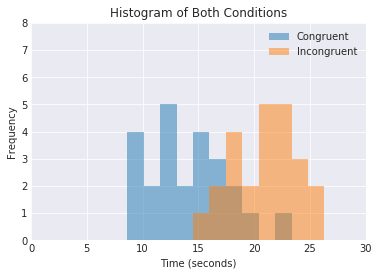

In [9]:
cong_series = df['Congruent']
incong_series = df['Incongruent']
cong_incong_series = df[['Congruent','Incongruent']]


title = 'Histogram of Both Conditions'
kind = 'hist'
alpha = 0.5
plot = cong_incong_series.plot(title=title, kind=kind, alpha=alpha, bins=12)
xLabel = plt.xlabel('Time (seconds)')
window = plt.axis([0,30,0,8])

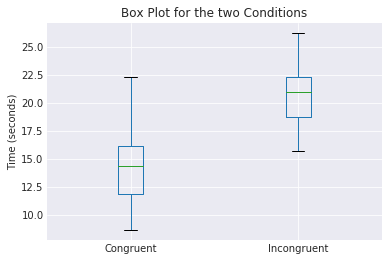

In [10]:
cong_incong_series = df[['Congruent','Incongruent']]
cong_mean = df['Congruent']
incong_mean = df['Incongruent']

# Box plots of the two conditions
title = 'Box Plot for the two Conditions'
kind = 'box'
cong_incong_series.plot(title=title, kind=kind)
ylabel = plt.ylabel('Time (seconds)')

### Observation 1

With th eabove visualization we can see that the 3rd quartile in the Congruent series is less than the 1st quartile in the InCongruent series. This visualization offers a good indication that the mean values for the congruent series are generally lower than the Incongruent.

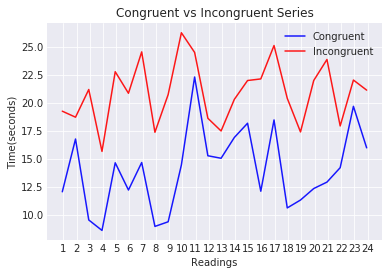

In [11]:
# Build the visualizations here

ind = np.arange(len(cong_mean))  # the x locations for the groups
width = 0.15       # the width of the bars

# plot lines
plt.plot(ind,cong_mean,label='Congruent',color='b', alpha=.9)
plt.plot(ind,incong_mean,label='Incongruent',color='r', alpha=.9);

# title and labels
plt.ylabel('Time(seconds)')
plt.xlabel('Readings')
plt.title('Congruent vs Incongruent Series')
locations = ind + width / 2  # xtick locations
labels = ['1', '2', '3', '4', '5', '6', '7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();

### Observation 2

With the help of the above visualization we identify that **each** participant needed more time to read the **Incongruent** serie than needed for the Congurent serie.

*Note* with the help of his visualization I noticed the 2 outliers in the data and decided to remove them.

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [12]:
# Perform the statistical test here

ttestResults = st.ttest_rel(incong_mean, cong_mean)
tstatistic = ttestResults[0]
pvalue = ttestResults[1]
print( "t-statistic = " + '%.2f' % tstatistic )
print( "p-value = " + '%.10f' % pvalue )

t-statistic = 10.06
p-value = 0.0000000007


### T-Test Results

Previously we've calculated descriptive statistics of both conditions.
We understood that the sample is equaly sized, we have interogated 24 participants, recorded 24 times for both condition the congruent and incongruent condition. As participants will be asked to read both series, the test will always have equaly sized entries. We have a relatively small sample size but the results of our analysis can be infered to the entire population.

In the Descriptive Statistics section we've computed the standard deviation as follows:
Congruent Standard Deviation is 3.559
Incongruent Standard Deviation is 2.768
We observed that the standard deviation is very similar for both conditions. 

Hence, in this analysis we have chosen to use a two-tailed t-test. Because participants have been asked to perform two readings, each participant has two entries our ttest will be a paired one. In other words for each participant we have one congruent entry and an incongruent entry.

The t-statistic has a value of 10.06 and a p-value of 0.0000000007. For this test we chose an alpha value of 0.05 with a two-tailed distirbution.
Based on the facts above we are able to REJECT the null hypothesis. This result is not surprising, it aligns with our intuition that there is significant difference between the times under which colors are recited when they match the denotation of the word and when they do not.

**Please Note** that the t-statistic value omits 2 entries which I considered outliers and removed from the DataFrame. I understand that the p-value is also refered to as the t-critical value, in our case  0.0000000007.

To fit the Stroop experiment, we can think of another example that only uses the visual sens. Here, an example would be showing a well known image like sea, sunset, winter snow, rain and promp subtitles denoting another image.

Another exmaple that I could think of, using this time not only the visual sens, is the subjecting participants to matching characteristics of well known animals. Matching the sound of an animal with it's image vs matching them when the image and the sound is different. 

The difference in times could be explained by the brain ability to easily make decision and provide answers matching the NEW situation with the previous experiences lived. A computer would be less likely to fail this test.
 
 
 

## Conclusions

After performing this test we are able to state that based on our sample data we have statistical evidence to strongly afirm that people stating the color of a word, denoting colors , takes a different amount of time when the names and the color match versus when the name doesn not match the color.

It will take our subjects longer to complete the test when the color and name do not match. We have seen this result using desciptive statistics on our sample data and have good reasons to infere this result to the entire population.
